In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [3]:
binding_df_full = pd.read_csv('data/GRB2-SH3.binding.csv')
binding_df = binding_df_full[['aa_seq','count_e1_s0','count_e1_s1']].dropna().reset_index(drop=True).copy()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
abundance_df_full = pd.read_csv('data/GRB2-SH3.abundance.csv')
abundance_df = abundance_df_full[['aa_seq','count_e1_s0','count_e1_s1']].dropna().reset_index(drop=True).copy()

In [5]:
data_df = binding_df.copy()
y_cols = data_df.columns[1:] 

In [6]:
X = data_df['aa_seq']
y = data_df[y_cols]

In [7]:
# set positional argumnets for gpmap function
L = len(data_df['aa_seq'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y', '*']


Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=57, Y=2


In [13]:
abundance_df_GE = abundance_df_full[['aa_seq','fitness']].copy()
abundance_df_GE.columns = ['aa_seq','fitness_abundance']

binding_df_GE = binding_df_full[['aa_seq','fitness']].copy()
binding_df_GE.columns = ['aa_seq','fitness_binding']

In [27]:
data_df = pd.read_csv('same_seq_data.csv')
data_df

,aa_seq,binding_fitness,abundance_fitness
0,NYVQALFDFDPQEDGELGFRRGDFIHVMDNSDPNWWKGACHGQTGM...,0.028944,0.005356
1,KYVQALFDFEPQEDGELGFRRGDFIHVMDNSDPNWWKGACHGQTGM...,-0.114049,0.093083
2,KYVQALFDFDPQEDGELGFRRGDFIHAMDNSDPNWWKGACHGQTGM...,-0.604463,-1.048527
3,KYVQALFDFDPQEDGELGFRRGDFIHVKDNSDPNWWKGACHGQTGM...,-0.015866,-0.119053
4,KYVQALFDFDPQEDGELGFRRGDFIHVMDNSDPN*WKGACHGQTGM...,-0.734009,-0.542546
...,...,...,...
5710,MYVQALFDFDPQEDGELGFRRGDVIHVMDNSDPNWWKGACHGQTGM...,0.084728,0.129528
5711,MYVQALFDFDPQEDGELGFRRGDFIHVMDNSDPNWWKGACHGQTGM...,-0.419314,-1.154684
5712,MYVQALFDFDPQEDGELGFRRGDFIHVMDNSDPNWWKGACHGQTGM...,0.039077,0.037401
5713,MYVQALFDFDPQEDGELGFRRGDFIHVMDNSDANWWKGACHGQTGM...,-0.168129,-0.103582


In [34]:
X = data_df['aa_seq'].values

In [30]:
y = np.hstack((data_df['binding_fitness'].values.reshape(-1,1),
               data_df['abundance_fitness'].values.reshape(-1,1)))

In [7]:
#data_df_GE = binding_df_full[['aa_seq','fitness']].copy()

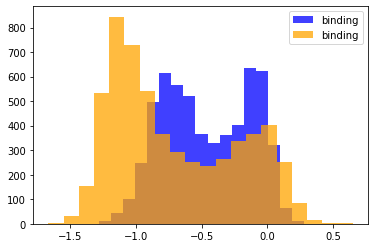

In [31]:
plt.hist(data_df['binding_fitness'],bins=20,color='blue',alpha=0.75,label='binding')
plt.hist(data_df['abundance_fitness'],bins=20,color='orange',alpha=0.75,label='binding')
plt.legend()
plt.show()

In [32]:
gpmapGE = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)

number_latent_nodes = 2

mp_GE_binding = mavenn.measurement_process_layers.GlobalEpsistasisMP(K=10)
mp_GE_abundance = mavenn.measurement_process_layers.GlobalEpsistasisMP(K=10)

model = mavenn.Model2(gpmap=gpmapGE,
                      mp_list=[mp_GE_binding,mp_GE_abundance])

# gpmapGE = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=number_latent_nodes)

#gpmapGE = mavenn.gpmap.MultilayerPerceptronGPMap(L, alphabet)
# mp_GE = mavenn.measurement_process_layers.GlobalEpsistasisMP(K=50,
#                                                            monotonic=True,
#                                                            number_latent_nodes=2,
#                                                            ge_heteroskedasticity_order=2,
#                                                            ge_noise_model_type='Gaussian')

2023-01-27 13:30:43.535447: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


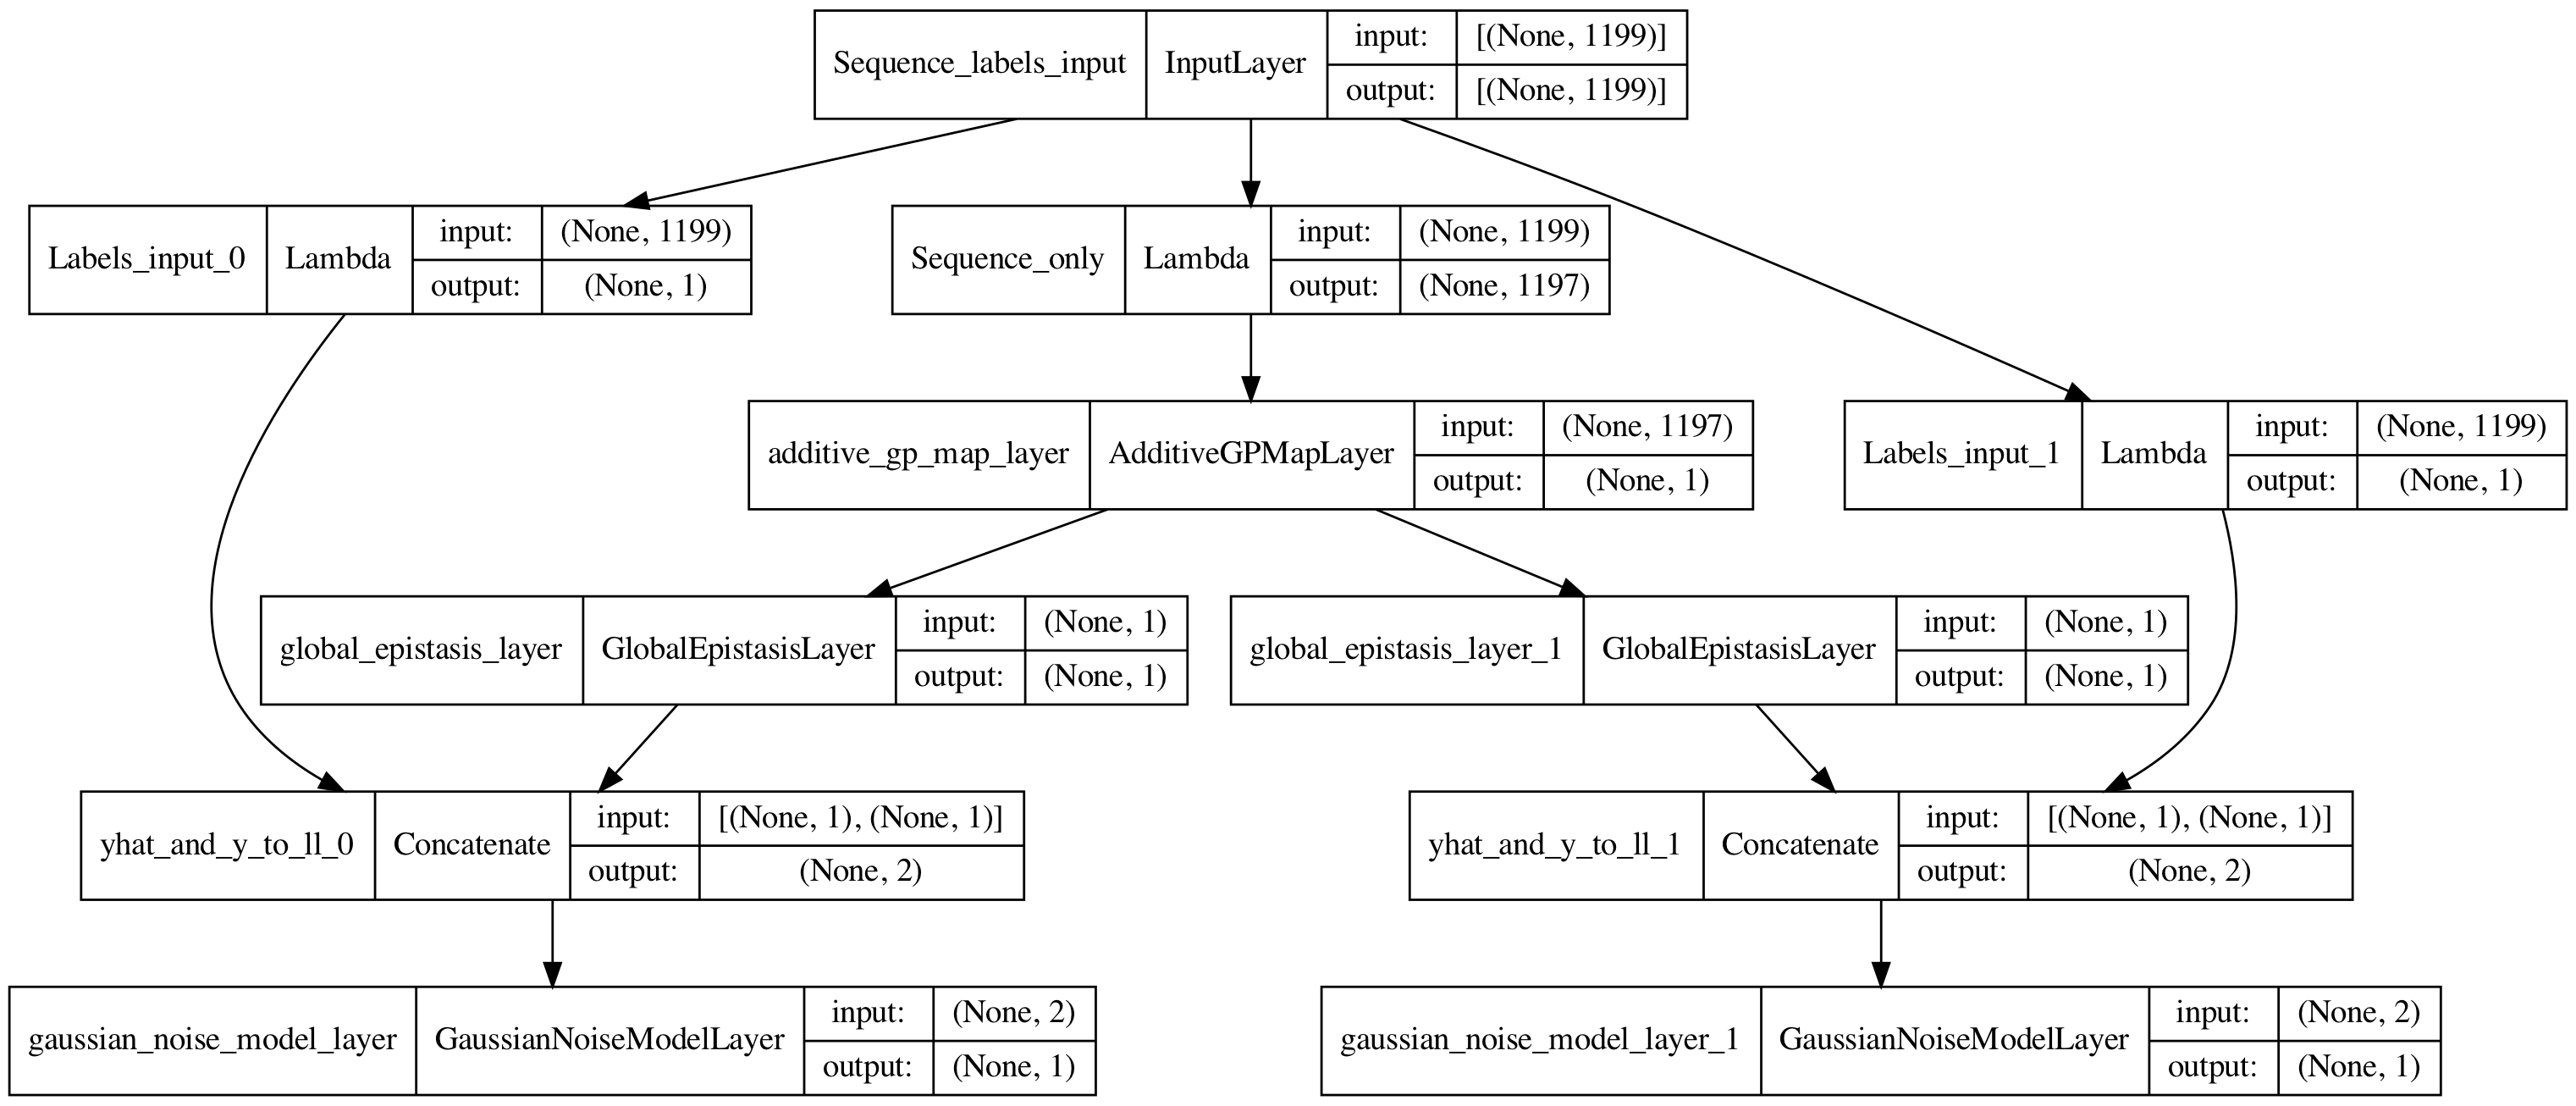

In [33]:

from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200)

In [35]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
y_train

array([[-0.62036822, -0.54311519],
       [-0.07616009,  0.14247707],
       [-0.33243694, -0.73431533],
       ...,
       [-0.0189621 , -0.37347565],
       [-0.72340889, -0.38437369],
       [ 0.09302328,  0.14900319]])

In [37]:
#y_list = [y1, y2, y3]
y_list = [y_train[:,0].reshape(-1,1),
          y_train[:,1].reshape(-1,1),]


In [38]:
# Set training data
model.set_data(x=x_train,
               y_list=y_list,
               shuffle=True)

N = 4,572 observations set as training data.
Using 20.1% for validation.
Data shuffled.
Time to set data: 0.331 sec.


In [39]:
x_train.shape

(4572,)

In [40]:
# Fit model to data
model.fit(learning_rate=.0005,
          epochs=100,
          try_tqdm=False,
          batch_size=100,
          early_stopping=False,
          #early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/100
37/37 [==============================] - 2s 13ms/step - loss: 203.2715 - gaussian_noise_model_layer_loss: 102.4836 - gaussian_noise_model_layer_1_loss: 100.7577 - I_var: -0.8343 - val_loss: 198.5547 - val_gaussian_noise_model_layer_loss: 100.5426 - val_gaussian_noise_model_layer_1_loss: 97.9835 - val_I_var: -0.8144
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 198.5713 - gaussian_noise_model_layer_loss: 100.4844 - gaussian_noise_model_layer_1_loss: 98.0594 - I_var: -0.7957 - val_loss: 195.3232 - val_gaussian_noise_model_layer_loss: 98.8027 - val_gaussian_noise_model_layer_1_loss: 96.4940 - val_I_var: -0.7929
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 195.3667 - gaussian_noise_model_layer_loss: 98.7988 - gaussian_noise_model_layer_1_loss: 96.5424 - I_var: -0.7740 - val_loss: 192.1514 - val_gaussian_noise_model_layer_loss: 97.1431 - val_gaussian_noise_model_layer_1_loss: 94.9836 - val_I_var: -0.7709
Epoch 4/100
37/37 [=

37/37 [==============================] - 0s 3ms/step - loss: 111.9668 - gaussian_noise_model_layer_loss: 59.7050 - gaussian_noise_model_layer_1_loss: 52.2412 - I_var: -0.1298 - val_loss: 110.2596 - val_gaussian_noise_model_layer_loss: 58.5911 - val_gaussian_noise_model_layer_1_loss: 51.6479 - val_I_var: -0.1423
Epoch 27/100
37/37 [==============================] - 0s 3ms/step - loss: 108.4963 - gaussian_noise_model_layer_loss: 58.1268 - gaussian_noise_model_layer_1_loss: 50.3488 - I_var: -0.1028 - val_loss: 106.9220 - val_gaussian_noise_model_layer_loss: 57.0546 - val_gaussian_noise_model_layer_1_loss: 49.8466 - val_I_var: -0.1168
Epoch 28/100
37/37 [==============================] - 0s 3ms/step - loss: 105.0854 - gaussian_noise_model_layer_loss: 56.5568 - gaussian_noise_model_layer_1_loss: 48.5076 - I_var: -0.0752 - val_loss: 103.6625 - val_gaussian_noise_model_layer_loss: 55.5465 - val_gaussian_noise_model_layer_1_loss: 48.0950 - val_I_var: -0.0913
Epoch 29/100
37/37 [===============

37/37 [==============================] - 0s 3ms/step - loss: 38.1352 - gaussian_noise_model_layer_loss: 25.6259 - gaussian_noise_model_layer_1_loss: 12.4827 - I_var: 0.4480 - val_loss: 41.1033 - val_gaussian_noise_model_layer_loss: 25.1784 - val_gaussian_noise_model_layer_1_loss: 15.8981 - val_I_var: 0.3774
Epoch 52/100
37/37 [==============================] - 0s 4ms/step - loss: 35.7839 - gaussian_noise_model_layer_loss: 24.5049 - gaussian_noise_model_layer_1_loss: 11.2521 - I_var: 0.4635 - val_loss: 38.2262 - val_gaussian_noise_model_layer_loss: 24.0518 - val_gaussian_noise_model_layer_1_loss: 14.1472 - val_I_var: 0.4013
Epoch 53/100
37/37 [==============================] - 0s 4ms/step - loss: 33.3783 - gaussian_noise_model_layer_loss: 23.4110 - gaussian_noise_model_layer_1_loss: 9.9400 - I_var: 0.4843 - val_loss: 36.4437 - val_gaussian_noise_model_layer_loss: 23.1731 - val_gaussian_noise_model_layer_1_loss: 13.2432 - val_I_var: 0.4132
Epoch 54/100
37/37 [============================

Epoch 77/100
37/37 [==============================] - 0s 4ms/step - loss: -7.8573 - gaussian_noise_model_layer_loss: 5.8737 - gaussian_noise_model_layer_1_loss: -13.7651 - I_var: 0.8321 - val_loss: 2.6153 - val_gaussian_noise_model_layer_loss: 6.5009 - val_gaussian_noise_model_layer_1_loss: -3.9200 - val_I_var: 0.6626
Epoch 78/100
37/37 [==============================] - 0s 3ms/step - loss: -9.3420 - gaussian_noise_model_layer_loss: 5.2951 - gaussian_noise_model_layer_1_loss: -14.6715 - I_var: 0.8399 - val_loss: 1.5340 - val_gaussian_noise_model_layer_loss: 5.8388 - val_gaussian_noise_model_layer_1_loss: -4.3394 - val_I_var: 0.6686
Epoch 79/100
37/37 [==============================] - 0s 3ms/step - loss: -10.2392 - gaussian_noise_model_layer_loss: 4.9479 - gaussian_noise_model_layer_1_loss: -15.2219 - I_var: 0.8493 - val_loss: 1.2483 - val_gaussian_noise_model_layer_loss: 5.5668 - val_gaussian_noise_model_layer_1_loss: -4.3534 - val_I_var: 0.6678
Epoch 80/100
37/37 [===================

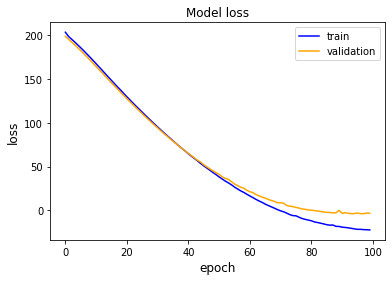

In [41]:
plt.plot(model.history['loss'], color='blue')
plt.plot(model.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])

In [42]:
from mavenn.src.utils import x_to_stats
stats = x_to_stats(x=x_test, alphabet=model.alphabet)
x_ohe_test = stats.pop('x_ohe')

In [43]:
import tensorflow as tf
import tensorflow.keras.backend as K


y_hat_functions = []
yhats = []

phi_function = K.function([model.model.layers[0].input], [model.model.layers[2].output])
phi_test = np.squeeze(phi_function(np.hstack([x_ohe_test,y_test])))

for _ in range(y_train.shape[1]):
    y_hat_functions.append(K.function([model.model.layers[0].input], [model.model.layers[2*_+3].output]))
    yhats.append(np.squeeze(y_hat_functions[_](np.hstack([x_ohe_test,y_test]))))

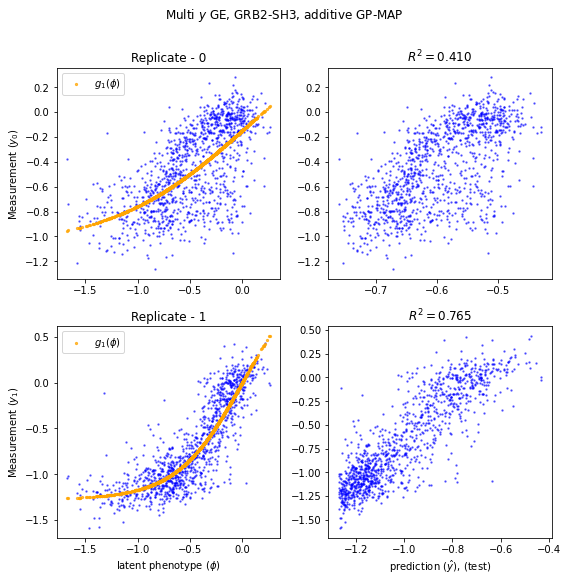

In [48]:
fig, ax = plt.subplots(y_train.shape[1],2,figsize=(8,8))

for _ in range(y_train.shape[1]):

    ax[_,0].set_title(f'Replicate - {_}')
    ax[_,0].scatter(phi_test,y_test[:,_], s=2,alpha=0.5,c='blue')
    ax[_,0].scatter(phi_test,yhats[_],s=5,alpha=0.75,label=f'$g_{1}(\phi)$',c='orange')
    #ax[_,0].scatter(phi_test,y_test[:,_].mean()+y_test[:,_].std()*yhats[_],s=5,alpha=0.75,label=f'$g_{1}(\phi)$')
    #ax[_,0].set_xlabel('latent phenotype $(\phi)$')
    ax[_,0].set_ylabel(f'Measurement $(y_{_})$')
    ax[_,0].legend()

    Rsq = np.corrcoef(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_])[0][1]**2
    ax[_,1].set_title('$R^2 = $' + str(Rsq)[0:5])
    ax[_,1].scatter(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_],s=2,alpha=0.5,c='blue')
    #diag = np.linspace(min(y_test[:,_]),max(y_test[:,_]),100)
    diag = np.linspace(-3,max(y_test[:,_]),100)
    #ax[_,1].plot(diag,diag,'--',color='black')

ax[_,0].set_xlabel('latent phenotype $(\phi)$')
ax[_,1].set_xlabel('prediction $(\hat y)$, (test)')
    
fig.suptitle('Multi $y$ GE, GRB2-SH3, additive GP-MAP',y=1.005)    
fig.tight_layout()
fig.savefig('plots/GRB2_SH3/global_epistasis_binding_multi_headed.png',dpi=300,bbox_inches='tight')    